In [28]:
import numpy as np
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.data.Metrics import relRMSE
from ssapp.Utils import FigureSaver
from torch.utils.data.dataloader import DataLoader
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,Matern
from ssapp.visualization.model_visualisations import plotModelPrediction

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

figSaver = FigureSaver('Gaussian Process Prediction',dpi = 600, default_format='png')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


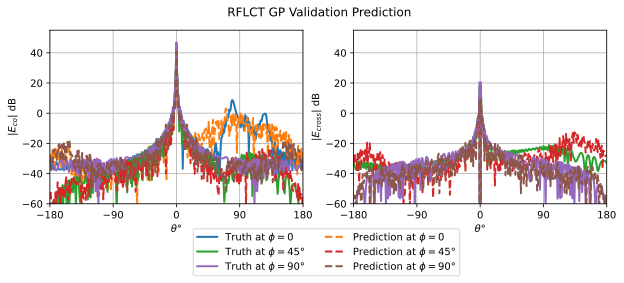

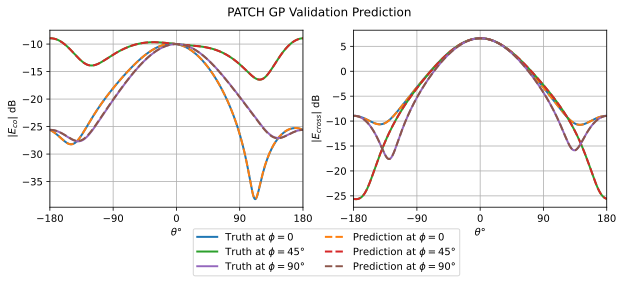

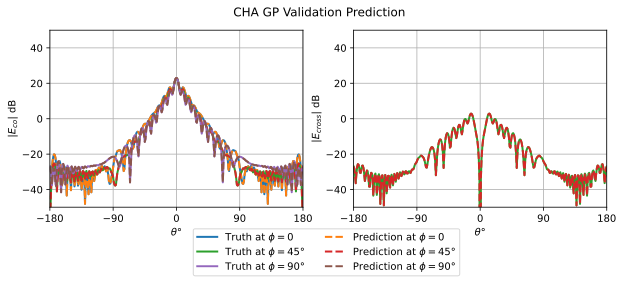

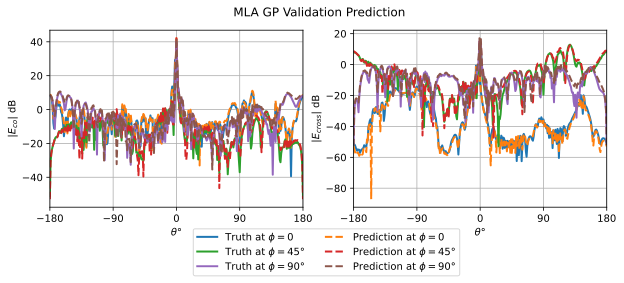

In [29]:
dataset_names = ['RFLCT',
                'PatchAntennaDataset2',
                'CircularHornDataset1',
                'MLADataset1']

dataset_kernels = [RBF(length_scale=1, length_scale_bounds='fixed'),
                    ConstantKernel(0.5,constant_value_bounds = 'fixed')*Matern(length_scale=5,nu=7.5,length_scale_bounds='fixed'),
                    ConstantKernel(10,constant_value_bounds = 'fixed')*RBF(length_scale=0.335,length_scale_bounds='fixed'),
                    ConstantKernel(100,constant_value_bounds = 'fixed')*RBF(length_scale=40,length_scale_bounds='fixed')]

titles = ['RFLCT GP Validation Prediction',
          'PATCH GP Validation Prediction',
          'CHA GP Validation Prediction',
          'MLA GP Validation Prediction']

save_names = ['RFLCT_GP_Validation_Prediction',
                'PATCH_GP_Validation_Prediction',
                'CHA_GP_Validation_Prediction',
                'MLA_GP_Validation_Prediction']

ylims = [[-60,55],None,[-50,50],None]

for i,dataset_name in enumerate(dataset_names):

    train_dataset = load_serialized_dataset(dataset_name+'_Train')
    val_dataset = load_serialized_dataset(dataset_name+'_Val')

    train_dataloader = DataLoader(train_dataset,batch_size=len(train_dataset),shuffle=True)
    val_dataloader = DataLoader(val_dataset,batch_size=len(val_dataset),shuffle=True)

    train_params, train_fields = next(iter(train_dataloader))
    val_params, val_fields = next(iter(val_dataloader))

    kernel = dataset_kernels[i]

    std_gp = Pipeline([('scaler', StandardScaler()), ('gp', GaussianProcessRegressor(kernel = kernel, normalize_y=True))])

    std_gp.fit(train_params, train_fields.reshape(len(train_fields),-1))
    pred = std_gp.predict(val_params)
    
    plotModelPrediction(pred,val_fields,idx = np.random.randint(0,len(val_fields)),ylim=ylims[i],title=titles[i])
    figSaver.save(save_names[i])




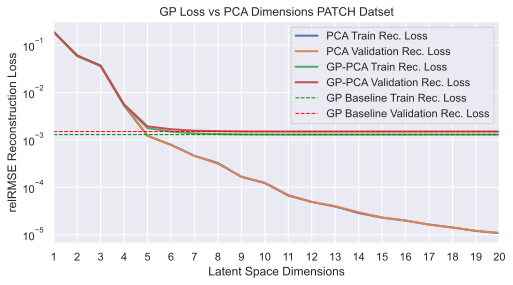

In [42]:

from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions
dataset = load_serialized_dataset('PatchAntennaDataset2')

plotGPvsPCADimensions(dataset,max_number_pca=20,kernel = ConstantKernel(0.5,constant_value_bounds='fixed')*Matern(length_scale=5,nu=6.5, length_scale_bounds='fixed'),title='GP Loss vs PCA Dimensions PATCH Datset')
figSaver.save(filename='PATCH_GP_Loss_vs_PCA_Dimensions')

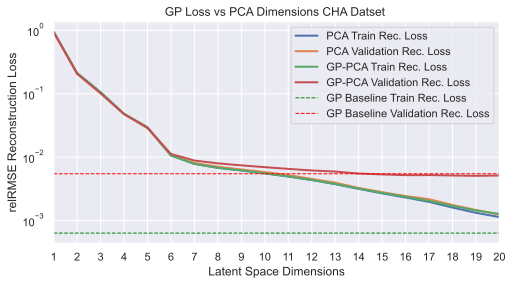

In [45]:
from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions
dataset = load_serialized_dataset('CircularHornDataset1')

plotGPvsPCADimensions(dataset,max_number_pca=20,kernel = ConstantKernel(10,constant_value_bounds='fixed')*RBF(length_scale=0.355, length_scale_bounds='fixed'),title='GP Loss vs PCA Dimensions CHA Datset ')
figSaver.save(filename='CHA_GP_Loss_vs_PCA_Dimensions')

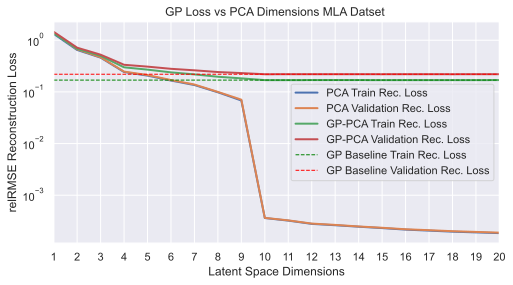

In [46]:
from ssapp.visualization.PCA_Visualisation import plotGPvsPCADimensions
dataset = load_serialized_dataset('MLADataset1')

plotGPvsPCADimensions(dataset,max_number_pca=20,kernel = ConstantKernel(100,constant_value_bounds='fixed')*RBF(length_scale=40, length_scale_bounds='fixed'),title='GP Loss vs PCA Dimensions MLA Datset ')
figSaver.save(filename='MLA_GP_Loss_vs_PCA_Dimensions')